<a href="https://colab.research.google.com/github/lelouch0204/CSF425-Deep-Learning/blob/main/Assignment-3-Forehead%20matching/results_calculation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from natsort import natsorted

In [ ]:
data_root = '/content/drive/MyDrive/Datasets/Ass-3'
data_path = '/content/drive/MyDrive/Datasets/Ass-3/foreheadData'

In [ ]:
file_path_arr = os.listdir(data_path)
len(file_path_arr)

337

In [ ]:
def parse_file(file_path):
    df = pd.read_csv(file_path)
    genuine = []
    imposter = []
    for index, row in df.iterrows():
        str1 = row[1].split('_')
        str2 = row[2].split('_')
        if str1[0]==str2[0]:
            genuine.append(row[3])
        else:
            imposter.append(row[3])
    return genuine, imposter

In [ ]:
def calc_scores(thresh, genuine, imposter):
    tp = 0
    fp = 0
    tn = 0
    fn = 0
    for g in genuine:
        if g < thresh:
            fn += 1
        else:
            tp += 1
    
    for i in imposter:
        if i < thresh:
            tn += 1
        else:
            fp += 1
    return (tp+tn)/(tp+tn+fp+fn), fp/(fp+tn), fn/(fn+tp)

In [ ]:
def plot_hist(genuine, imposter):
    bins = np.linspace(0, 1, 50)
    plt.hist(imposter, bins, alpha=0.25, label='imposter', weights=np.ones(len(imposter)) / len(imposter), histtype = 'stepfilled', align = 'mid')
    plt.hist(genuine, bins, alpha=0.5, label='genuine', weights=np.ones(len(genuine)) / len(genuine), histtype = 'stepfilled')
    plt.legend(loc='upper right')
    plt.show()

In [ ]:
def calc_metrics(threshes, genuine, imposter):
    scores = {}
    crrs = []
    fars = []
    frrs = []
    eer_diff = 1000
    eer = 1000
    acc = 1000
    for thresh in threshes:
        scores[thresh] = calc_scores(thresh, genuine, imposter)
        crrs.append(scores[thresh][0])
        fars.append(scores[thresh][1])
        frrs.append(scores[thresh][2])
        ##print(scores[thresh][1])
        ##print(scores[thresh][2])
        if(abs(scores[thresh][1]-scores[thresh][2])<eer_diff):
            ##print(eer_diff)
            ##print(scores[thresh][2])
            eer_diff = abs(scores[thresh][1]-scores[thresh][2])
            eer = thresh
            acc = 1 - (scores[thresh][1]+scores[thresh][2])/2
    ##print(eer_diff)
    return crrs, fars, frrs, eer, acc

In [ ]:
threshes = np.arange(0, 1, 0.0001).tolist()
print(threshes)

[0.0, 0.0001, 0.0002, 0.00030000000000000003, 0.0004, 0.0005, 0.0006000000000000001, 0.0007, 0.0008, 0.0009000000000000001, 0.001, 0.0011, 0.0012000000000000001, 0.0013000000000000002, 0.0014, 0.0015, 0.0016, 0.0017000000000000001, 0.0018000000000000002, 0.0019, 0.002, 0.0021000000000000003, 0.0022, 0.0023, 0.0024000000000000002, 0.0025, 0.0026000000000000003, 0.0027, 0.0028, 0.0029000000000000002, 0.003, 0.0031000000000000003, 0.0032, 0.0033, 0.0034000000000000002, 0.0035, 0.0036000000000000003, 0.0037, 0.0038, 0.0039000000000000003, 0.004, 0.0041, 0.004200000000000001, 0.0043, 0.0044, 0.0045000000000000005, 0.0046, 0.0047, 0.0048000000000000004, 0.0049, 0.005, 0.0051, 0.005200000000000001, 0.0053, 0.0054, 0.0055000000000000005, 0.0056, 0.0057, 0.0058000000000000005, 0.0059, 0.006, 0.0061, 0.006200000000000001, 0.0063, 0.0064, 0.006500000000000001, 0.0066, 0.0067, 0.0068000000000000005, 0.006900000000000001, 0.007, 0.0071, 0.007200000000000001, 0.0073, 0.0074, 0.007500000000000001, 0.

In [ ]:
def plot_roc(fars, frrs):
    plt.plot(fars, frrs)
    plt.xlabel('False Acceptance Rate')
    plt.ylabel('False Rejection Rate')
    plt.show()

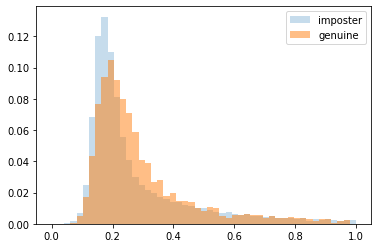

In [ ]:
genuine_sift, imposter_sift = parse_file('/content/drive/MyDrive/Datasets/Ass-3/output_SIFT_3.csv')
plot_hist(genuine_sift, imposter_sift)

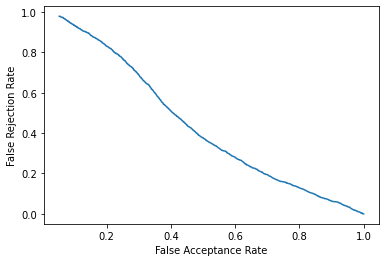

EER for SIFT algorithm is 0.2272
Accuracy for SIFT algorithm is 55.391130217519105


In [ ]:
crrs_sift, fars_sift, frrs_sift, eer_sift, acc_sift = calc_metrics(threshes, genuine_sift, imposter_sift)
plot_roc(fars_sift, frrs_sift)
print("EER for SIFT algorithm is", eer_sift)
print("Accuracy for SIFT algorithm is", acc_sift*100)

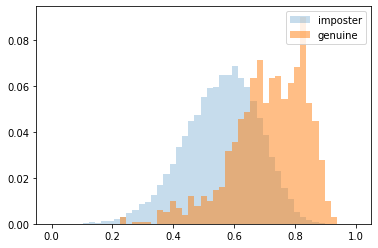

In [ ]:
genuine_arc, imposter_arc = parse_file('/content/drive/MyDrive/Datasets/Ass-3/output_ARC_1.csv')
for i in range(len(genuine_arc)):
    genuine_arc[i] = 1 - genuine_arc[i]
for i in range(len(imposter_arc)):
    imposter_arc[i] = 1 - imposter_arc[i]
plot_hist(genuine_arc, imposter_arc)

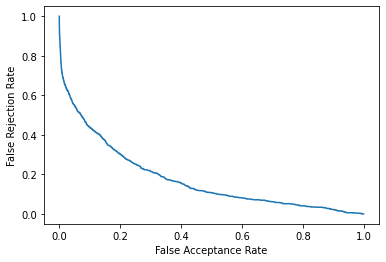

EER for ArcFace algorithm is 0.6446000000000001
Accuracy for ArcFace algorithm is 74.90079365079364


In [ ]:
crrs_arc, fars_arc, frrs_arc, eer_arc, acc_arc = calc_metrics(threshes, genuine_arc, imposter_arc)
plot_roc(fars_arc, frrs_arc)
print("EER for ArcFace algorithm is", eer_arc)
print("Accuracy for ArcFace algorithm is", acc_arc*100)

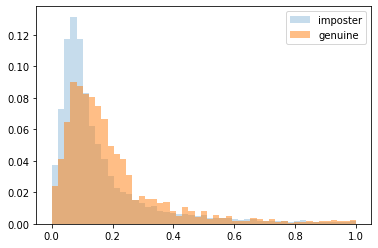

In [ ]:
genuine_surf, imposter_surf = parse_file('/content/drive/MyDrive/Datasets/Ass-3/output_SURF_1.csv')
plot_hist(genuine_surf, imposter_surf)

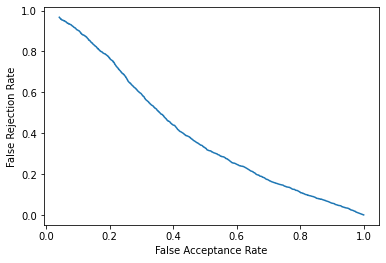

EER for SURF algorithm is 0.1288
Accuracy for SURF algorithm is 58.38477366255144


In [ ]:
crrs_surf, fars_surf, frrs_surf, eer_surf, acc_surf = calc_metrics(threshes, genuine_surf, imposter_surf)
plot_roc(fars_surf, frrs_surf)
print("EER for SURF algorithm is", eer_surf)
print("Accuracy for SURF algorithm is", acc_surf*100)

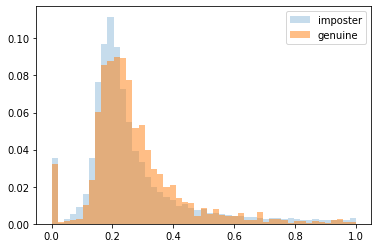

In [ ]:
genuine_orb, imposter_orb = parse_file('/content/drive/MyDrive/Datasets/Ass-3/output_ORB_2.csv')
plot_hist(genuine_orb, imposter_orb)

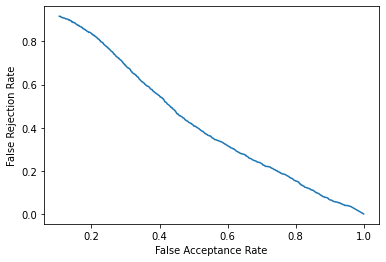

EER for ORB algorithm is 0.24000000000000002
Accuracy for ORB algorithm is 54.207724544115976


In [ ]:
crrs_orb, fars_orb, frrs_orb, eer_orb, acc_orb = calc_metrics(threshes, genuine_orb, imposter_orb)
plot_roc(fars_orb, frrs_orb)
print("EER for ORB algorithm is", eer_orb)
print("Accuracy for ORB algorithm is", acc_orb*100)

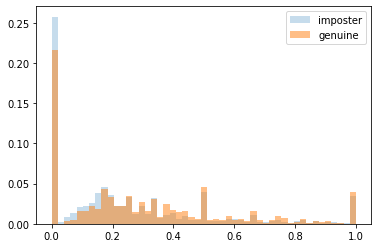

In [ ]:
genuine_akaze, imposter_akaze = parse_file('/content/drive/MyDrive/Datasets/Ass-3output_akaze_1.csv')
plot_hist(genuine_akaze, imposter_akaze)

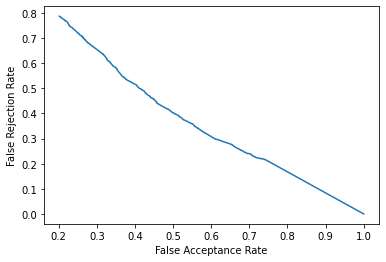

EER for AKAZE algorithm is 0.2642
Accuracy for AKAZE algorithm is 54.72663139329805


In [ ]:
crrs_akaze, fars_akaze, frrs_akaze, eer_akaze, acc_akaze = calc_metrics(threshes, genuine_akaze, imposter_akaze)
plot_roc(fars_akaze, frrs_akaze)
print("EER for AKAZE algorithm is", eer_akaze)
print("Accuracy for AKAZE algorithm is", acc_akaze*100)

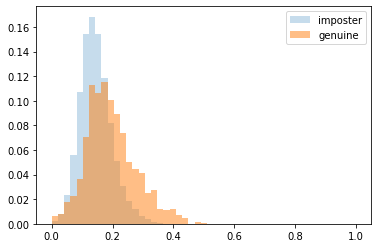

In [ ]:
genuine_SSIM, imposter_SSIM = parse_file('/content/drive/MyDrive/Datasets/Ass-3/output_SSIM_1.csv')
plot_hist(genuine_SSIM, imposter_SSIM)

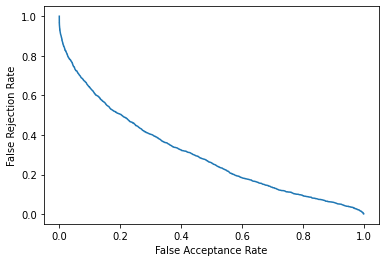

EER for SSIM algorithm is 0.1588
Accuracy for SSIM algorithm is 64.3637933568489


In [ ]:
crrs_SSIM, fars_SSIM, frrs_SSIM, eer_SSIM, acc_SSIM = calc_metrics(threshes, genuine_SSIM, imposter_SSIM)
plot_roc(fars_SSIM, frrs_SSIM)
print("EER for SSIM algorithm is", eer_SSIM)
print("Accuracy for SSIM algorithm is", acc_SSIM*100)

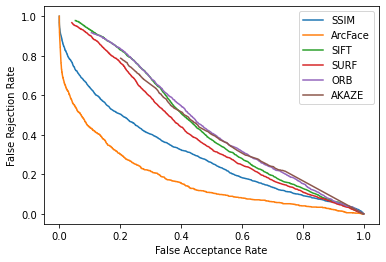

In [ ]:
plt.plot(fars_SSIM,frrs_SSIM, label="SSIM")
plt.plot(fars_arc,frrs_arc, label="ArcFace")
plt.plot(fars_sift,frrs_sift, label="SIFT")
plt.plot(fars_surf,frrs_surf, label="SURF")
plt.plot(fars_orb,frrs_orb, label="ORB")
plt.plot(fars_akaze,frrs_akaze, label="AKAZE")
plt.xlabel('False Acceptance Rate')
plt.ylabel('False Rejection Rate')
plt.legend(loc='upper right')